<a href="https://colab.research.google.com/github/insaiyancvk/dog-vision/blob/main/Dog_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Use [this](https://postimages.org/) for uploading *your* dog's picture to a temporary cloud server. Or give any URL which has a dog in it :) 

### **Note:** Paste the URL next to "direct link" (in postimages.org website) in `custom_url` variable between the double quotes (" ").

In [1]:
custom_url = "https://i.postimg.cc/J0rj53GX/dog-1.jpg"

# Step 2: Go to "runtime" ➡ "run all"

In [2]:
# Import all the required libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

In [3]:
# Reading the breeds CSV file
breeds = pd.read_csv("https://raw.githubusercontent.com/insaiyancvk/dog-vision/main/breeds.csv")
breeds = np.array(breeds)
unique_breeds = np.unique(breeds)

In [4]:
# Download the image
urllib.request.urlretrieve(custom_url, "1.jpg");

In [5]:
# Gathering all the required functions into one cell.
IMG_SIZE = 224
# preprocessing images
def process_image(image_path, IMG_SIZE=IMG_SIZE):
  """
  Takes an image file path and turns the image into Tensors
  """
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=(IMG_SIZE, IMG_SIZE))
  return image

BATCH_SIZE = 32
# Turn data into batches
def create_data_batches(X, y=None, batch_size= BATCH_SIZE):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles data if it's training data but doesn't shuffle if it's validation data
  Also accepts test data as input(no labels).
  """
  print("Creating data batches...")
  data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
  data_batch = data.map(process_image).batch(BATCH_SIZE)
  return data_batch

def get_pred_label(prediction_probabilities):
  """
  Turns an array of predction probabilities into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                      custom_objects={"KerasLayer": hub.KerasLayer})
  return model

In [6]:
# Download the model
!wget https://github.com/insaiyancvk/dog-vision/raw/main/20210124-19191611515999-full-image-set-mobilenetv2-Adam.h5

--2021-02-01 10:39:27--  https://github.com/insaiyancvk/dog-vision/raw/main/20210124-19191611515999-full-image-set-mobilenetv2-Adam.h5
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/insaiyancvk/dog-vision/main/20210124-19191611515999-full-image-set-mobilenetv2-Adam.h5 [following]
--2021-02-01 10:39:28--  https://raw.githubusercontent.com/insaiyancvk/dog-vision/main/20210124-19191611515999-full-image-set-mobilenetv2-Adam.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23412364 (22M) [application/octet-stream]
Saving to: ‘20210124-19191611515999-full-image-set-mobilenetv2-Adam.h5’

20210124-1919161

In [7]:
custom_data = create_data_batches(["1.jpg"])
model = load_model("20210124-19191611515999-full-image-set-mobilenetv2-Adam.h5")
prediction = model.predict(custom_data)
prediction_label = [get_pred_label(prediction[i]) for i in range(len(prediction))]

Creating data batches...
Loading saved model from: 20210124-19191611515999-full-image-set-mobilenetv2-Adam.h5


In [8]:
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)
img = custom_images[0]

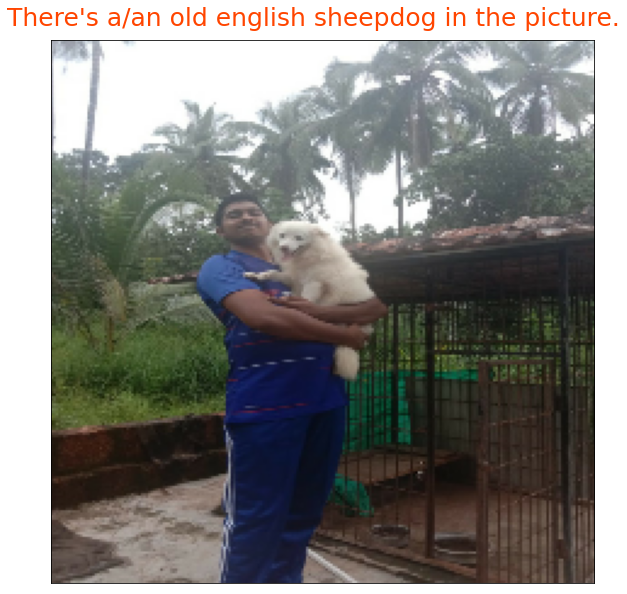

In [16]:
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.figtext(.5,.9,"There's a/an "+prediction_label[0].replace("_"," ")+" in the picture.", fontsize=25, ha="center", color="orangered")
plt.imshow(img);

In [10]:
# Remove the downloaded image and the model
!rm -f 1.jpg 20210124-19191611515999-full-image-set-mobilenetv2-Adam.h5